In [1]:
import os,sys
import csv
import copy
import math

import matplotlib
import matplotlib.pyplot as plt
from clawpack import pyclaw
from clawpack import riemann
import numpy as np

from scipy.integrate import simps, trapz

sys.path.append("/home/pgrover/Dropbox/PhD/Morphodynamic_Model/pymorph")
from weno import get_left_flux,get_right_flux
from weno import get_stencil
from shallow_water_solver import shallow_solver
from avalanche_scheme import *
#from clawpack_geometry_tools import read_ascii

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Dune Test
The dune geometry from the Queen's lab will be tested using the Exner-1D WENO model and the shallow water solver from Clawpack.First thing is to be able to read in the geometry into the clawpack mesh.

In [2]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

filepath = '/home/pgrover/Paper_4_Turbulence_Modelling/FlumeExperiment/geometries/flume_profile_smoothed.txt'
import collections

retval = collections.OrderedDict()
x = []
z = []
x = 0.0
with open(filepath) as f:
    for line in f:
        values = line.split()
        if is_number(values[0])==False:
            if float(values[1]).is_integer():
                retval[values[0]]=int(values[1])
            else:
                retval[values[0]]=float(values[1])
        else:
            z.append(float(values[0]))
z = np.array(z)
print('Z: {0}'.format(len(z)))
xmax = float(retval['nrows']) * retval['cellsize']
nx = retval['nrows']
dx = retval['cellsize']

Z: 87


In [3]:

xdomain = x = pyclaw.Dimension(0.0,xmax,retval['nrows'],name='x')
domain = pyclaw.Domain(xdomain)
state = pyclaw.State(domain,1)
xc = state.grid.x.centers
dx = state.grid.delta[0]
print('Grid dx = {0}'.format(dx))
print('Grid nx = {0}'.format(len(xc)))


Grid dx = 0.03
Grid nx = 87


In [4]:
import logging
logger = logging.getLogger('pyclaw')
logger.setLevel(logging.CRITICAL)

# Gravitational constant
state.problem_data['grav'] = 9.8
state.problem_data['sea_level'] = 0.0
xc = state.grid.x.centers

a=0.001
b=3.0
Q=10.0
nP=0.4
zc = z.copy()

shw_slvr = shallow_solver(domain)
u, surf,h = shw_slvr.run(zc,0.2)


(87, 87)


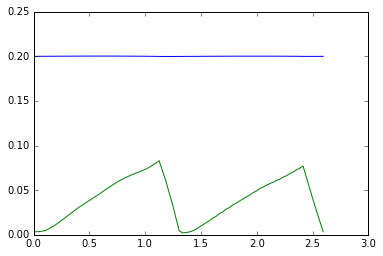

In [5]:
plt.plot(xc,surf)
plt.plot(xc,z)

In [6]:
u

array([ 0.31309223,  0.3132189 ,  0.31414332,  0.31507195,  0.31811262,
        0.32216678,  0.32531886,  0.33028138,  0.33501368,  0.34008563,
        0.34572245,  0.35129089,  0.35714163,  0.36287477,  0.36839457,
        0.37399764,  0.37940809,  0.38494566,  0.39095986,  0.39704526,
        0.40377384,  0.41082409,  0.4179089 ,  0.42527174,  0.43234602,
        0.43921795,  0.44578268,  0.45202243,  0.45787407,  0.46343271,
        0.46880674,  0.47412078,  0.47982601,  0.48634273,  0.49414578,
        0.50334911,  0.51363316,  0.52628669,  0.47974742,  0.44140421,
        0.4028595 ,  0.37141678,  0.34074903,  0.3150455 ,  0.31134696,
        0.31178563,  0.31285897,  0.31490191,  0.31762507,  0.32173469,
        0.32561281,  0.33003993,  0.33389691,  0.33902542,  0.34302866,
        0.34873741,  0.35273846,  0.35892086,  0.36284516,  0.36905783,
        0.37335552,  0.37902286,  0.38396968,  0.38965256,  0.39486256,
        0.40161349,  0.40670923,  0.4139418 ,  0.41897023,  0.42